In [1]:
import plotly

from src.dataviz import DatabasePlots

In [2]:
db_plots = DatabasePlots()

In [3]:
db_plots.df.CENTRE_POINTS.head(5)

,node,node_verbose,country,region,subregion,geometry
0,AFG-XX,Afghanistan,Afghanistan,Asia,Southern Asia,POINT (66.03059 33.82888)
1,AGO-XX,Angola,Angola,Africa,Sub-Saharan Africa,POINT (17.57616 -12.33727)
2,ALB-XX,Albania,Albania,Europe,Southern Europe,POINT (20.06196 41.14084)
3,ARE-XX,United Arab Emirates,United Arab Emirates,Asia,Western Asia,POINT (54.33630 23.90734)
4,ARG-XX,Argentina,Argentina,Americas,Latin America and the Caribbean,POINT (-65.14102 -35.18534)


In [4]:
db_plots.df.DATABASE.head(5)

,from,to,existing capacity + (mw),existing capacity - (mw),planned capacity + (mw),planned capacity - (mw),year planned,assumptions/applied methods,other notes,source existing (2023),source planned
0,AFG-XX,CHN-XI,0.0,0.0,0.0,0.0,NaN,NaN,Afghanistan had joined China's Belt and Road i...,https://iea.blob.core.windows.net/assets/b066e...,https://www.reuters.com/world/asia-pacific/tal...
1,AFG-XX,IRN-XX,175.0,-175.0,325.0,-325.0,NaN,It's reported that as of 2022 trade potential ...,NaN,https://www.tehrantimes.com/news/468852/Iran-e...,https://www.tehrantimes.com/news/468852/Iran-e...
2,AFG-XX,PAK-XX,0.0,0.0,0.0,0.0,NaN,NaN,Following the specifics of the CASA-1000 proje...,https://iea.blob.core.windows.net/assets/b066e...,https://iea.blob.core.windows.net/assets/b066e...
3,AFG-XX,TKM-XX,0.0,-400.0,1000.0,-1000.0,NaN,NaN,Currently a trade agreement of 400 MW for unil...,https://iea.blob.core.windows.net/assets/b066e...,https://pajhwok.com/2023/01/29/power-supply-pr...
4,ARE-XX,IND-WE,0.0,0.0,0.0,0.0,NaN,NaN,"No capacity as of yet, but a subsea transmissi...",https://openinframap.org/#4.16/20.3/63.43,https://www.siasat.com/india-planning-power-gr...


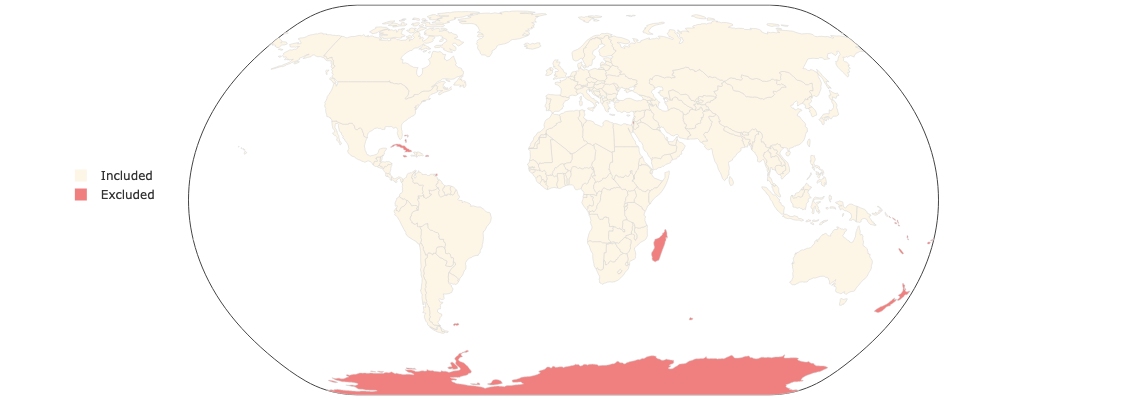

In [40]:
fig = db_plots.map_excluded_regions(
    showgrid=False,
    colours={
        'Included' : 'oldlace', 
        'Excluded' : 'lightcoral'
    },
    
)

# legend loc
fig.update_layout(
    legend=dict(
        yanchor="top",
        y=0.6,
        xanchor="left",
        x=0.05,
        orientation="v",
    )
)

fig.write_html('../outputs/figures/map_excluded_regions.html')
plotly.io.write_image(fig, '../outputs/figures/map_excluded_regions.pdf', format='pdf')
plotly.io.write_image(fig, '../outputs/figures/map_excluded_regions.pdf', format='pdf')

fig.show()

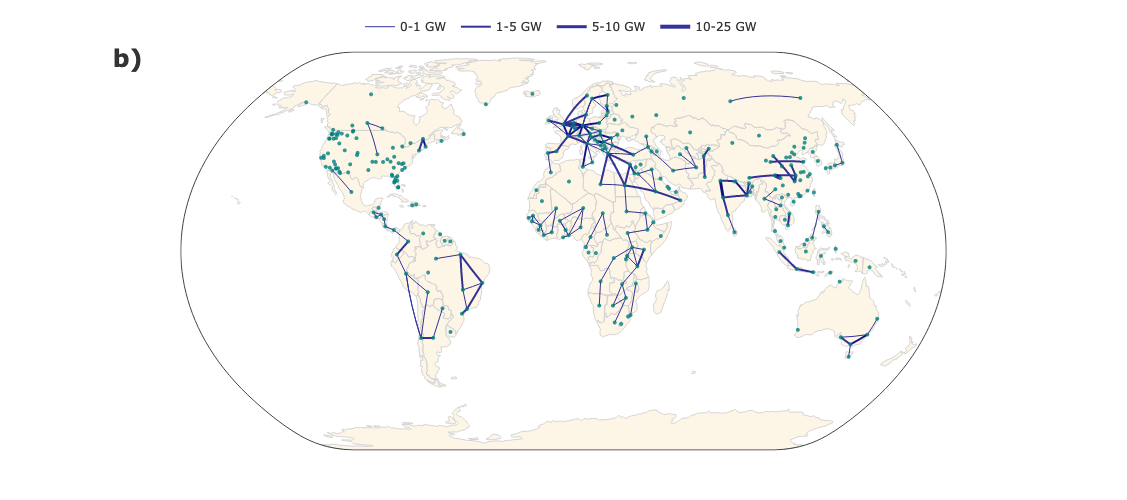

In [38]:
fig,nodes,lines = db_plots.map_transmission_lines(
    bins = [0,1,5,10,25],
    labels = ['0-1','1-5','5-10','10-25'],
    planned_capacity = True,
    node_size = 4,
    colours = {
        'node' : 'teal',
        'landcolor' : 'oldlace',
        'borders' : 'lightgray',
        'oceancolor' : 'white',
        'line_existing' : 'lightcoral',
        'line_planned' : 'navy',
    },
    line_min_width = 1,
    line_step = 1.0,
    showgrid = False,
    title = '<b>b)</b>',
    legend_title = None,
)

# formatting
fig.update_layout(
    title=dict(
        font=dict(size=24)
    ),
    title_x=0.1,
    title_y=0.9,
    legend=dict(
        yanchor="top",
        y=1.1,
        xanchor="center",
        x=0.5,
        orientation="h",
    ),
)

fig.write_html('../outputs/figures/map_capacity_planned.html')
plotly.io.write_image(fig, '../outputs/figures/map_capacity_planned.pdf', format='pdf')

fig.show()

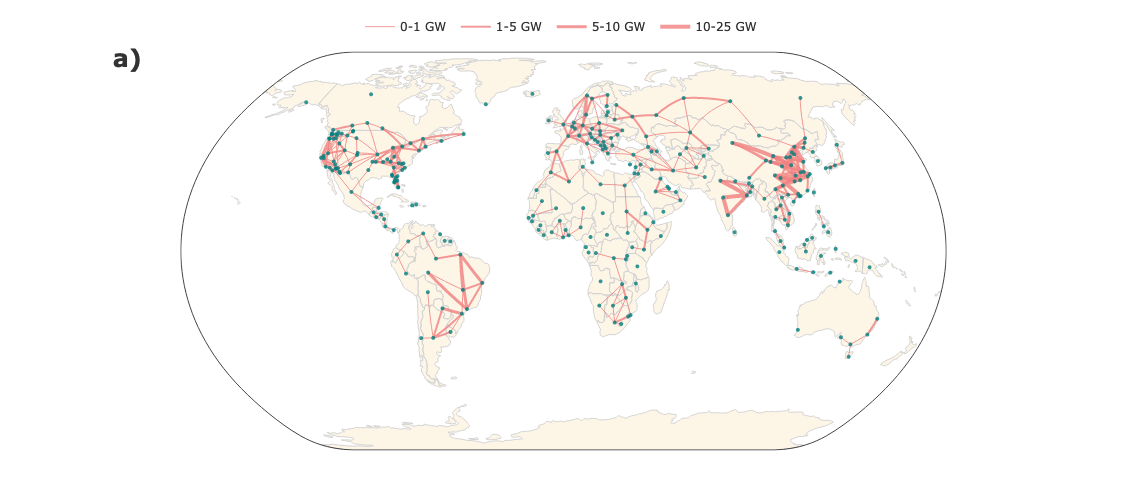

In [37]:
fig,nodes,lines = db_plots.map_transmission_lines(
    bins = [0,1,5,10,25],
    labels = ['0-1','1-5','5-10','10-25'],
    planned_capacity = False,
    node_size = 4,
    colours = {
        'node' : 'teal',
        'landcolor' : 'oldlace',
        'borders' : 'lightgray',
        'oceancolor' : 'white',
        'line_existing' : 'lightcoral',
        'line_planned' : 'navy',
    },
    line_min_width = 1,
    line_step = 1.0,
    showgrid = False,
    title = '<b>a)</b>',
    legend_title = None,
)

# formatting
fig.update_layout(
    title=dict(
        font=dict(size=24)
    ),
    title_x=0.1,
    title_y=0.9,
    legend=dict(
        yanchor="top",
        y=1.1,
        xanchor="center",
        x=0.5,
        orientation="h",
    ),
)

fig.write_html('../outputs/figures/map_capacity_existing.html')
plotly.io.write_image(fig, '../outputs/figures/map_capacity_existing.pdf', format='pdf')

fig.show()

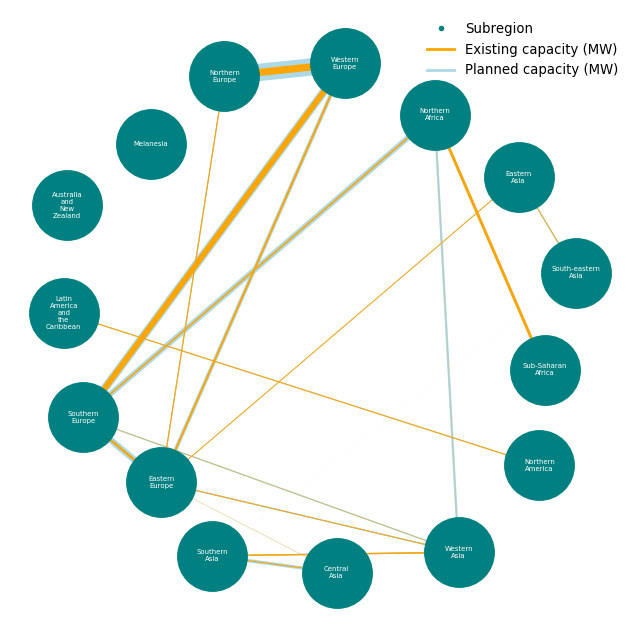

In [8]:
f = db_plots.network_topology(
    by='subregion',
    jitter=100,
    node_size=2500,
    font_size=5,
    legend_scale=1.2,
    figsize=(8,8),
)

f.savefig(
    fname = '../outputs/figures/nx_network_topology.pdf',
    bbox_inches = 'tight',
)

In [9]:
# db_plots.network_topology(
#     by='subregion',
#     jitter=100,
#     node_size=4000,
#     font_size=8,
#     legend_scale=1.3,
#     figsize=(10,10),
#     colours = {'planned' : 'lightcoral', 'existing' : 'teal'},
# )